# Итоговая работа по модулю Python

### Исходные данные
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

#### Описание датасета:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

### Задание
1) Загрузите файл HR.csv в pandas dataframe - 5 баллов

2) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). - 10 баллов

3) 1 - Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 

3) 2 - Определите две самые скоррелированные и две наименее скоррелированные переменные.  - 10 баллов

4) Рассчитайте сколько сотрудников работает в каждом департаменте. - 5 баллов

5) Показать распределение сотрудников по зарплатам.- 5 баллов

6) Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности- 5 баллов

7) Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом - 10 баллов

8) Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): - 10 баллов
-  Доля сотрудников с повышением за последние 5 лет
-  Средняя степень удовлетворенности
-  Среднее количество проектов

9) 1 - Разделить данные на тестовую и обучающую выборки

9) 2 - Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

9) 3 - Оценить качество модели на тестовой выборки - 20 баллов

10) Загрузить jupyter notebook с решение на github и прислать ссылку - 5 баллов

### Итого - максимум 85 баллов
### Зачёт - минимум 55 баллов

### Решение

#### Используемые библиотеки

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

#### 1) Загрузите файл HR.csv в pandas dataframe - 5 баллов

In [7]:
hr_data = pd.read_csv('HR.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Вывод
При загрузке видим файл, состоящий из 14999 строк - все ненулевые(доп обработки не требуется), 10 столбцов разных типов данных: количественные и качественные, типы данных: объекты, целочисленные, с плавающей точкой.

#### 2) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). - 10 баллов

In [9]:
# классическое описание датасета при помощи метода .describe()
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# отдельный расчёт статистических метрик при помощи отдельных методов соответственно, максимальное, минимальное значение
# медиана, мода, дисперсия, СКО и 1 и 3 квартили
print('Maximums\n{}\n\n Minimums\n{}\n\n Medians\n{}\n\n Mode\n{}\n\n Dispersion\n{}\n\n \
      Standard deviation\n{}\n\n Quantile 0.25/0.75\n{}\n\n'.format(hr_data.max(), hr_data.min(),hr_data.median(), 
                                                                    hr_data.mode(), hr_data.var(), hr_data.std(), 
                                                                    hr_data.quantile([0.25, 0.75])))

Maximums
satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

 Minimums
satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

 Medians
satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

 Mode
   satisfactio

#### Вывод
Исходя из анализа метрик можно сказать следующее:

1. Крупная компания - 14999 сотрудников, 10 лет в работе
2. Средний уровень удовлетворённости работой 0,61, что вцелом неплохо, стоит отметить, что мода = 0,1, а значит наиболее встречаемый ответ сотрудника - "сильно не удовлетворён работой"
3. Работает 5 дней в неделю, сотрудники в среднем перерабатывают ( об этом говорит среднее и медианное значение, если берём классический рабочий деь 160 часов)
4. При этом люди задерживаются в компании минимум на 2 года, а через 3,5 года(среднее значение) уходят
5. Высокий показатель инцидентов в компании - 14,5% это нехорошо
6. Повышают редко - за последние 5 лет только 2% сотрудников

#### 3) 1 - Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. 

In [11]:
# производим выборку столбцов с количественными переменными
quant_data = hr_data.iloc[:,:5]
quant_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [12]:
# расчёт коэффициентов корреляции по методу Кендалла
quant_data.corr(method = 'kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


<AxesSubplot:>

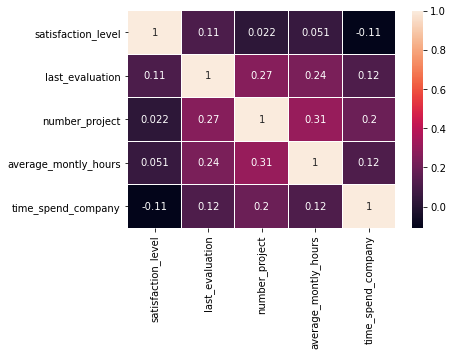

In [13]:
# отобразим результаты, показав результата вычислений на тепловой карте
sns.heatmap(quant_data.corr(method = 'kendall'), annot=True, linewidths=.01)

#### 3) 2 - Определите две самые скоррелированные и две наименее скоррелированные переменные.  - 10 баллов

Опираясь на коэффициенты корреляции Кенделла:

- две самые скоррелированные переменные - average_monthly_hours и number_project, т.е. "Среднее количество часов на рабочем месте в месяц" и "Количество проектов, выполненных за время работы"

- две наименее скоррелированные переменные - number_project и satisfaction_level, т.е. "Количество проектов, выполненных за время работы" и "Уровень удовлетворенности работой" 

#### 4) Рассчитайте сколько сотрудников работает в каждом департаменте. - 5 баллов

In [14]:
# используем метод построения сводных таблиц, выбрав индекс строки(department), что считаем(salary) и как считаем(count), добавив столбец суммы
quantity_employees = hr_data.pivot_table(index = 'department',  values = 'salary', aggfunc = 'count', margins = True, margins_name = 'All')
quantity_employees

,salary
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


#### 5) Показать распределение сотрудников по зарплатам.- 5 баллов

In [15]:
# используем метод построения сводных таблиц, выбрав индекс строки(salary), что считаем(department) и как считаем(count), добавив столбец суммы
salary_employees = hr_data.pivot_table(index = 'salary', values = 'department', aggfunc = 'count', margins = True, margins_name = 'All')
salary_employees

,department
salary,
high,1237
low,7316
medium,6446
All,14999


#### 6) Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности- 5 баллов

In [16]:
# здесь используя группировку по двумя показателями department и salary, рассчитаем количество сотрудников
kindof_salary = hr_data.groupby(['department', 'salary']).agg({'time_spend_company':'count'})
kindof_salary

time_spend_company
department  salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

#### 7) Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом - 10 баллов

H0: среднее время провождения на работе у сотрудников с высоким и низким окладом - одинаково

H1: среднее время провождения на работе у сотрудников с высоким и низким окладом - различается

alpha = 0.05

In [17]:
# собираем два датафрейма для высоких и низких зарплат по среднеотработанными часам в месяц
high_salary = hr_data[hr_data.salary == 'high'][['average_montly_hours']]
low_salary = hr_data[hr_data.salary == 'low'][['average_montly_hours']]

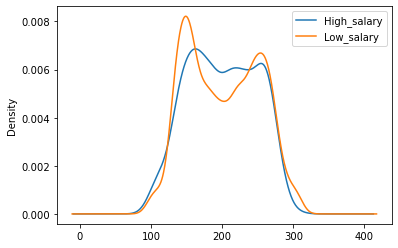

In [18]:
# покажет распределение на графике
high_salary.average_montly_hours.plot(kind='density', label='High_salary')
low_salary.average_montly_hours.plot(kind='density', label='Low_salary')
plt.legend()

In [19]:
# определив уровень значимости, проверим нулевую гипотезу при помощи дисперсионного анализа и Манни Уитни
alpha = 0.05
result_1 = f_oneway(high_salary, low_salary)
result_2 = mannwhitneyu(high_salary, low_salary)

print('Высокая з/п:',high_salary.mean())
print('\n')  
print('Низкая з/п:',low_salary.mean())
print('\n')    
print('Дисперсионный анализ',result_1)
if result_1.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее время провождения на работе у сотрудников с высоким и низким окладом - различается(Разное распределение)')
else:
    print('Не отвергаем нулевую гипотезу(Одинаковое распределение)')
print('\n')    
print('Критерий Марий Уитни для независимых выборок',result_2)
if result_2.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее время провождения на работе у сотрудников с высоким и низким окладом - различается(Разное распределение)')
else:
    print('Не отвергаем нулевую гипотезу(Одинаковое распределение)')

Высокая з/п: average_montly_hours    199.867421
dtype: float64


Низкая з/п: average_montly_hours    200.996583
dtype: float64


Дисперсионный анализ F_onewayResult(statistic=array([0.53124862]), pvalue=array([0.46610235]))
Не отвергаем нулевую гипотезу(Одинаковое распределение)


Критерий Марий Уитни для независимых выборок MannwhitneyuResult(statistic=4507096.5, pvalue=0.4120665360429347)
Не отвергаем нулевую гипотезу(Одинаковое распределение)


### Вывод
Мы не можем отвергнуть нулевую гипотезу, что "среднее время провождения на работе у сотрудников с высоким и низким окладом - одинаково" и подтвердить тоже не можем

#### 8) Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): - 10 баллов
-  Доля сотрудников с повышением за последние 5 лет
-  Средняя степень удовлетворенности
-  Среднее количество проектов

In [43]:
# Доля сотрудников с повышением за последние 5 лет - отобразим в новом созданном столбце как отношение к общему количеству
# сгруппировав и посчитав суммы для ушедших и оставшихся
hr_data_count = hr_data
hr_data_count['dolya'] = hr_data_count['promotion_last_5years'] / hr_data_count['promotion_last_5years'].count()
hr_data_count[hr_data_count['promotion_last_5years'] == 1].groupby('left').sum()['dolya']

left
0    0.020001
1    0.001267
Name: dolya, dtype: float64

In [107]:
# сгруппируем по столбцу left и посчитаем среднюю степень удовлетворённости 
hr_data_count.groupby('left').agg({'satisfaction_level':'mean'})

,satisfaction_level
left,
0,0.666810
1,0.440098


In [42]:
# сгруппируем по столбцу left и посчитаем количество проектов при помощи библиотеке numpy 
hr_data_count.groupby('left').agg({'number_project': np.mean})

,number_project
left,
0,3.786664
1,3.855503


#### Вывод
1. доля сотрудников с повышением за последние 5 лет всего 2% среди оставшихся и 0,1% среди уволившихся, что говорит о неудовлетворенной потребности повышения с обоих сторон
2. среди оставшихся 66,7% удовлетворены - достаточно низкий показатель удовлетворённости - руководоству стоит задуматься, тех кто ушли 44%, оба показатели  логичны
3. среднее количество проектов среди уволившихся и оставшихся примерно одинаковое - 3,8 проекта

#### 9) 1 - Разделить данные на тестовую и обучающую выборки

In [30]:
# импортируем нужную библиотеке для обучения
from sklearn.model_selection import train_test_split

In [31]:
# разделяем данные на результат и данные для анализи
y = hr_data['left']
X = hr_data.iloc[:,:8]

In [32]:
# делим на тестовую(30% данных) и обучающую выборку(70% данных)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 9) 2 - Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

In [33]:
# импортируем библиотеке для LDA анализа
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
# создаём класс
lda = LinearDiscriminantAnalysis()

In [35]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [36]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# смотрим результат факт и прогноз
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [38]:
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
13388,0.0,NaN
10463,0.0,NaN
5331,0.0,NaN
7499,0.0,NaN


#### 9) 3 - Оценить качество модели на тестовой выборки - 20 баллов

In [39]:
# импортируем библиотеку для расчета точности - отношение верный прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [40]:
# точность нашей модели (количество верных на общее количество)
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

In [41]:
# коэффициенты дискриминатных линий 3 линии отделяющие классы друг от друга и 2 числа - два признака
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
         0.00000000e+00, -1.08559074e+00]])

### Вывод
Наша модель для оценки ухода сотрудников получилась достаточно точная 75% 

10) оформление
https://github.com/Dmitry-2020/Python_course/blob/master/4_Diplom/Diplom_Python.ipynb